In [1]:
#Data:images
# Download manually images from google
#download dataset from kaggle.Com
#build an image web crawler
#Use python librairies to scrape images.



# !pip install ipython-autotime
%load_ext autotime


time: 0 ns (started: 2024-07-10 14:01:13 +01:00)


In [2]:
# !pip install bing_image_downloader

time: 0 ns (started: 2024-07-10 14:01:13 +01:00)


In [3]:
# !mkdir samples


time: 0 ns (started: 2024-07-10 14:01:13 +01:00)


In [4]:
from bing_image_downloader import downloader 
# downloader.download("Cats", limit = 500,output_dir= 'samples')
# downloader.download("Dogs", limit = 250,output_dir= 'samples')
# downloader.download("Rabbits", limit = 150,output_dir= 'samples')

time: 15 ms (started: 2024-07-10 14:01:13 +01:00)


In [5]:
# from bing_image_downloader import downloader 



time: 0 ns (started: 2024-07-10 14:01:13 +01:00)


In [6]:
# from bing_image_downloader import downloader 



time: 0 ns (started: 2024-07-10 14:01:13 +01:00)


In [7]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np 
from skimage.io import imread
from skimage.transform  import resize



time: 1.55 s (started: 2024-07-10 14:01:13 +01:00)


In [8]:

#1- resizing
#2-applatir(flatten)
target= []
images= []
flat_data = []


DATADIR = 'samples/'
CATEGORIES = ['Cats', 'Dogs', 'Rabbits']

for category in CATEGORIES: 
    class_num = CATEGORIES.index(category)
    path = os.path.join(DATADIR, category)
    
    for img in os.listdir(path):
        
        # check file extension
        if img.endswith('.jpg') or img.endswith('.jpeg') or img.endswith('.png'):
            try:
                img_array = imread(os.path.join(path, img))
                # print(img_array)
                #plt.imshow(img_array)

                # resize image to (100, 100) and flatten
                img_resized = resize(img_array, (150, 150,3))#normalizes the value from 0 to 1
                flat_img = img_resized.flatten()
                # append flattened image to list
                flat_data.append(flat_img)
                images.append(img_resized)
                target.append(class_num)
            except Exception as e:
                print(f"Error reading file: {img}. {e}")



time: 4min 48s (started: 2024-07-10 14:01:15 +01:00)


In [9]:
flat_data= np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 344 ms (started: 2024-07-10 14:06:03 +01:00)


In [10]:
len(flat_data[0]) #150*150*3

67500

time: 16 ms (started: 2024-07-10 14:06:03 +01:00)


In [11]:
input_shape= (150, 150, 3)

time: 0 ns (started: 2024-07-10 14:06:03 +01:00)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense




time: 5.17 s (started: 2024-07-10 14:06:03 +01:00)


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split


X = flat_data
y = np.array(target)

# Split the data into training and testing sets (typically 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (632, 67500), y_train shape: (632,)
X_test shape: (158, 67500), y_test shape: (158,)
time: 281 ms (started: 2024-07-10 14:06:08 +01:00)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

X_train_images = X_train.reshape(-1, 150, 150, 3)
X_test_images = X_test.reshape(-1, 150, 150, 3)
from tensorflow.keras.regularizers import l2



model = Sequential([
    Conv2D(32, (3, 3), activation='relu',  input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(3, activation='softmax', ) 
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [15]:
# Train the model
history = model.fit(X_train_images, y_train, epochs=25, validation_data=(X_test_images, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_images, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/25
20/20 [==============================] - 12s 544ms/step - loss: 1.3710 - accuracy: 0.3576 - val_loss: 1.2302 - val_accuracy: 0.4114
Epoch 2/25
20/20 [==============================] - 11s 532ms/step - loss: 1.1855 - accuracy: 0.4209 - val_loss: 1.1779 - val_accuracy: 0.3608
Epoch 3/25
20/20 [==============================] - 11s 535ms/step - loss: 1.0973 - accuracy: 0.5063 - val_loss: 1.1096 - val_accuracy: 0.5253
Epoch 4/25
20/20 [==============================] - 11s 548ms/step - loss: 0.9483 - accuracy: 0.5870 - val_loss: 1.1139 - val_accuracy: 0.5190
Epoch 5/25
20/20 [==============================] - 12s 597ms/step - loss: 0.7316 - accuracy: 0.7342 - val_loss: 1.1201 - val_accuracy: 0.5506
Epoch 6/25
20/20 [==============================] - 11s 575ms/step - loss: 0.5699 - accuracy: 0.8006 - val_loss: 1.3559 - val_accuracy: 0.5380
Epoch 7/25
20/20 [==============================] - 11s 570ms/step - loss: 0.4760 - accuracy: 0.8481 - val_loss: 1.5082 - val_accuracy: 0.5949

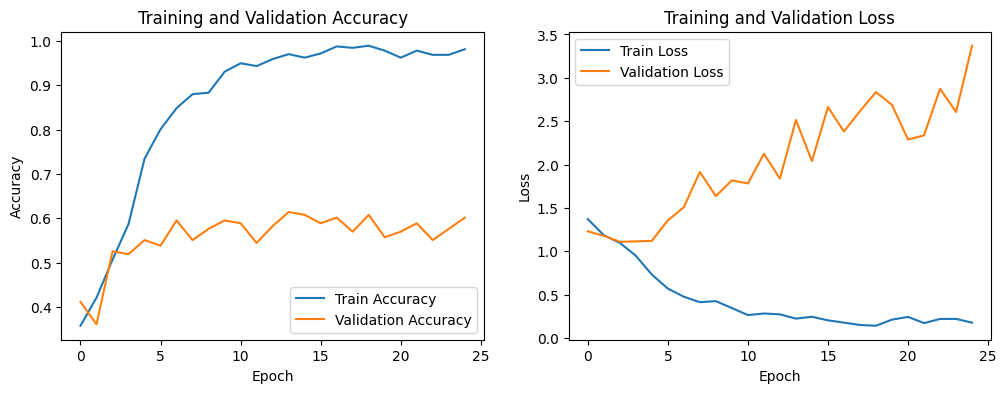

5/5 - 1s - loss: 3.3697 - accuracy: 0.6013 - 1s/epoch - 221ms/step
Test accuracy: 0.6012658476829529
Test loss: 3.369687557220459
time: 2.73 s (started: 2024-07-10 14:20:00 +01:00)


In [24]:
# Plotting training history
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.show()

test_loss, test_acc = model.evaluate(X_test_images, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')


In [17]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Define the input shape
# input_shape = (67500,)

# # Define the number of classes
# num_classes = 3

# # Define the model architecture
# model = Sequential()
# model.add(Dense(64, activation='relu', input_shape=input_shape))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

# # Fit the model to the training data
# history = model.fit(x_train, y_train, epochs=20,validation_split=0.2)

time: 0 ns (started: 2024-07-10 14:10:43 +01:00)


In [18]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # set the input shape
# input_shape = (150, 150, 3)

# # create the model
# model = Sequential()

# # add convolutional layers
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # add flatten layer
# model.add(Flatten())

# # add dense layers with dropout
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# # add output layer
# model.add(Dense(3, activation='softmax'))

# # compile the model
# model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# # create data generators
# train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# test_datagen = ImageDataGenerator(rescale=1./255)
# from keras.utils import np_utils

# # reshape x_train and x_test
# x_train = x_train.reshape(x_train.shape[0], 150, 150, 3)
# x_test = x_test.reshape(x_test.shape[0], 150, 150, 3)

# # convert y_train and y_test to categorical
# y_train = np_utils.to_categorical(y_train, num_classes=3)
# y_test = np_utils.to_categorical(y_test, num_classes=3)
# # create train and test generators
# train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
# test_generator = test_datagen.flow(x_test, y_test, batch_size=32)


# # train the model
# history = model.fit(train_generator, steps_per_epoch=len(x_train)//32, epochs=30, validation_data=test_generator, validation_steps=len(x_test)//32)

time: 0 ns (started: 2024-07-10 14:10:43 +01:00)


In [19]:
# from sklearn.metrics import accuracy_score, confusion_matrix

time: 0 ns (started: 2024-07-10 14:10:43 +01:00)


In [20]:
# accuracy_score(y_pred, y_test)

time: 0 ns (started: 2024-07-10 14:10:43 +01:00)
